In [71]:
import matplotlib.pyplot as plt
from matplotlib.backend_bases import RendererBase
from scipy import signal
from scipy.io import wavfile
#import soundfile as sf
import os
import numpy as np
from PIL import Image
from scipy.fftpack import fft

%matplotlib inline

In [74]:
# loading the audio

audio_path = "C:/Users/Acer/New folder2/"
audio = os.listdir(audio_path)

In [75]:
x, sr = librosa.load(audio_path+audio[0], sr=44100)
 
print(type(x), type(sr))
print(x.shape, sr)

PermissionError: [Errno 13] Permission denied: 'C:/Users/Acer/New folder2/fold1'

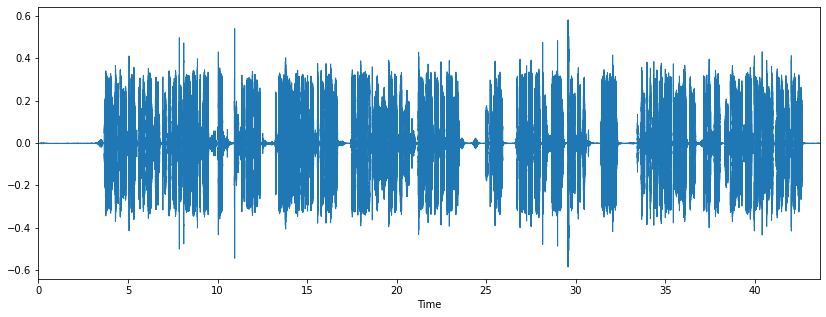

In [76]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

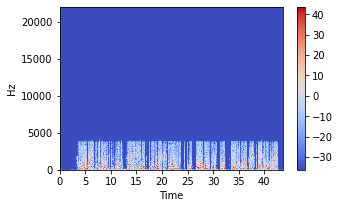

In [77]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(5, 3))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [101]:
#### Extracting spectrogram For every audio file
import pandas as pd
import os
import librosa

# audio_dataset_path='/Documents/FYP/New folder2/'
pict_Path = 'C:/Users/Acer/New folder3'
audio_dataset_path='C:/Users/Acer/New folder2'
metadata=pd.read_csv('C:/Users/Acer/metadata/metadata.csv')
metadata.head()

,ID,fold,WaveFileName,M(1)/F(0),class,classID
0,1,1,Paragraph 1.wav,0,ex,1
1,2,1,Paragraph 1_E3.wav,0,ex,1
2,3,2,Paragraph 2_E3.wav,0,ex,1
3,4,3,Paragraph 3.wav,0,ex,1
4,5,3,Paragraph 3_E3.wav,0,ex,1


In [110]:
def spectrogeam_creator(file):
    audio, smaple_rate = librosa.load(file_name, res_type='kaiser_fast')
    X = librosa.stft(audio)
    Xdb = librosa.amplitude_to_db(abs(audio))
    
    return Xdb


In [121]:
!pip install opencv-python

20it [01:13,  3.65s/it]


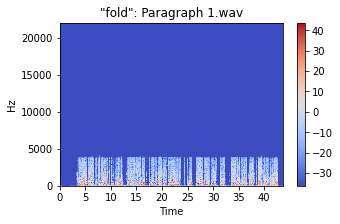

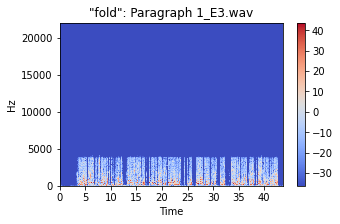

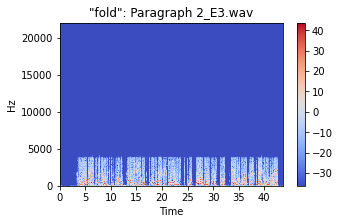

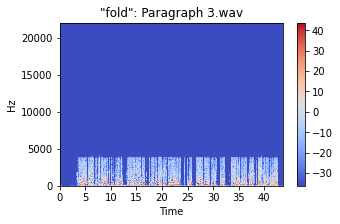

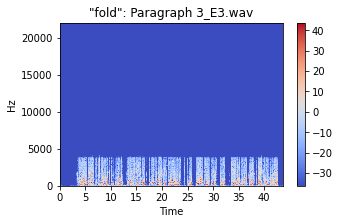

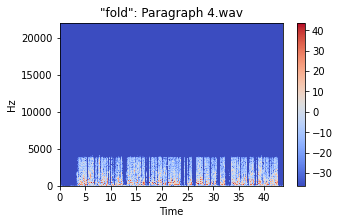

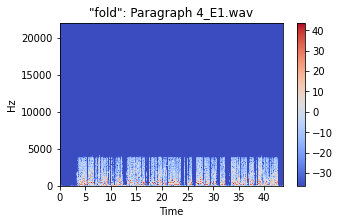

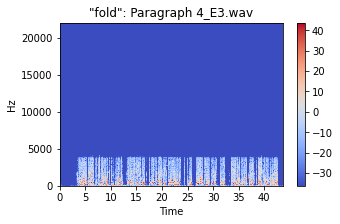

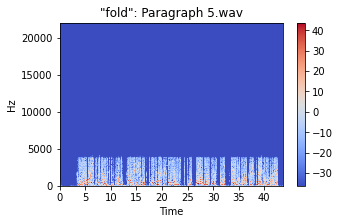

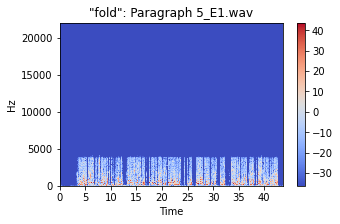

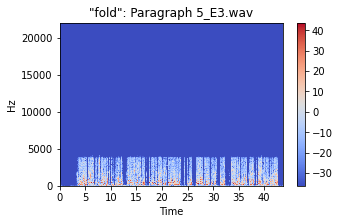

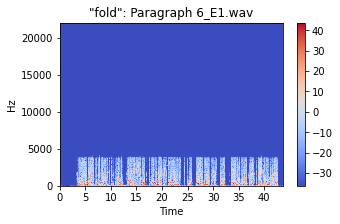

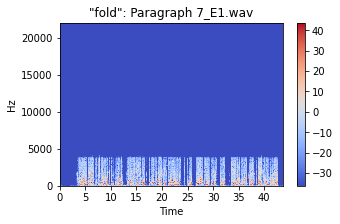

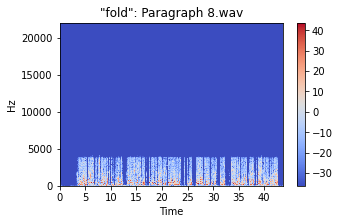

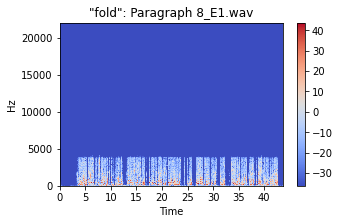

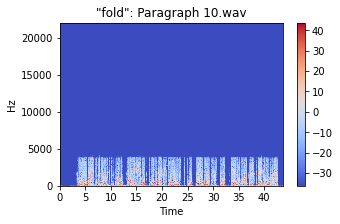

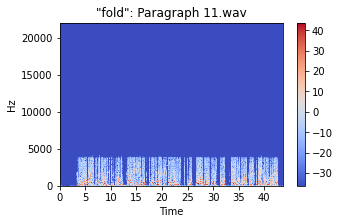

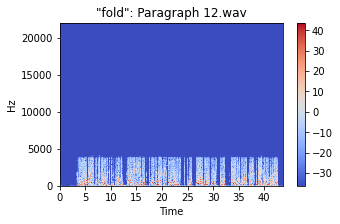

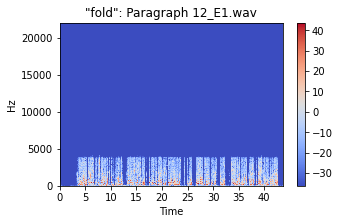

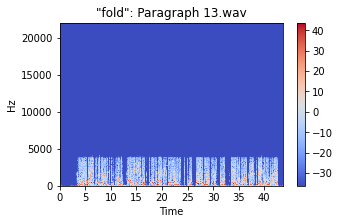

In [123]:
import numpy as np
from tqdm import tqdm

for index_num,row in tqdm(metadata.iterrows()):

    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["WaveFileName"]))
    data=spectrogeam_creator(file_name)

    plt.figure(figsize=(5, 3))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    # pull the labels
    label = file_name.split('/')[-1]
    plt.title('"fold": '+label)
    plt.colorbar()

In [106]:
def wav2spec_img(wav_path, tardetdir='', figsize=(4,4)):
    audio, smaple_rate = librosa.load(file_name, res_type='kaiser_fast')
    X = librosa.stft(audio)
    Xdb = librosa.amplitude_to_db(abs(audio))
    spectrogram = librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    
    output_file = file_name.split('/')[-1].split('.wav')[0]   
    output_file = targetdir +'/'+ output_file
    plt.imsave('%s.png' % output_file, spectrogram)
    plt.close()

In [107]:
import numpy as np
from tqdm import tqdm

for index_num,row in tqdm(metadata.iterrows()):
#     wav_path = audio_dataset_path
#     file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["WaveFileName"]))
#     data=wav2spec_img(wav_path + x + '/' + file_name, pict_path + x)

    all_files = [y for y in os.listdir(audio_dataset_path + x) if '.wav' in y]
    for file in all_files:
        wav2img(audio_dataset_path + x + '/' + file_name, pict_Path + x)

0it [00:00, ?it/s]


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')